В качестве алгоритма для определения различия между траекториями использовалась метрика Хаусдорфа.  

In [1]:
from scipy.spatial.distance import directed_hausdorff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("traks.csv", sep=';')
data

,track,time,x,y
0,1,10:32:13,1598,526
1,1,10:32:14,1524,544
2,1,10:32:15,1441,557
3,1,10:32:16,1357,392
4,1,10:32:17,1395,573
...,...,...,...,...
109,4,10:42:09,432,689
110,4,10:42:10,450,736
111,4,10:42:11,503,754
112,4,10:42:12,1620,924


Делим исходный набор данных по четырем соответствующим траекториям. В новых датафреймах оставляем только столбцы с координатами "X" и "Y" и переписываем индексы так, чтобы они начинались с 0.

In [3]:
fi_t = data[data['track'] == 1]
first_track = fi_t[["x", "y"]]
first_track.index = np.arange(len(first_track))

sec_t = data[data['track'] == 2]
second_track = sec_t[["x", "y"]]
second_track.index = np.arange(len(second_track))

thi_t = data[data['track'] == 3]
third_track = thi_t[["x", "y"]]
third_track.index = np.arange(len(third_track))

fout = data[data['track'] == 4]
fourth_track = fout[["x", "y"]]
fourth_track.index = np.arange(len(fourth_track))

#вывод числа точек в каждой траектории
print(first_track.shape[0])
print(second_track.shape[0])
print(third_track.shape[0])
print(fourth_track.shape[0])

35
27
33
19


Видим, что количество точек в траекториях может значительно различаться. Метрика Хаусдорфа позволяет искать расстояния между кривыми с неравным количеством точек, но для более точного результата масштабируем датафреймы до примерно одинаковых размеров:

Исходная траектория представляет собой ломанную кривую. Будем добавлять точки посередине отрезков этой ломаной до тех пор, пока число точек траектории не станет равным необходимому значению. Так как траектории 3 и 5 меньше всего различаются по количеству точек, то остальные траектории будем тоже приравнивать к ним. 

C:\Users\poder\AppData\Local\Temp/ipykernel_7820/2413569268.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(second_track["x"], second_track["y"], "o-r", color = 'black')


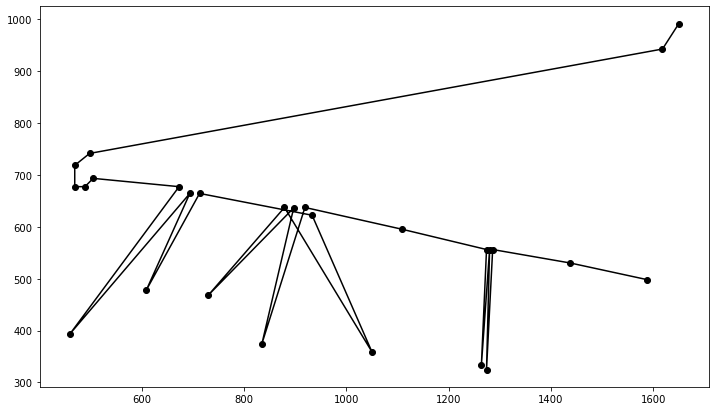

In [4]:
#отобразим, для примера, вторую траекторию до преобразований
plt.figure(figsize = (12, 7))
plt.plot(second_track["x"], second_track["y"], "o-r", color = 'black')
plt.show()

In [5]:
def insert_row(df, idx, ax, ay):  
    top = df.iloc[:idx]
    bot = df.iloc[idx:]
    top = top.append({'x': ax, 'y': ay}, ignore_index=True)
    inserted = pd.concat([top, bot], ignore_index=True)
    return inserted

In [6]:
def zoom_df(df, size):
    i = 1
    while df.shape[0] < size:
        ax = (df.loc[i - 1]['x'] + df.loc[i]['x'])/2
        ay = (df.loc[i - 1]['y'] + df.loc[i]['y'])/2
        df = insert_row(df, i, ax, ay)
        i += 2
    return df

second_track = zoom_df(second_track, third_track.shape[0])
fourth_track = zoom_df(fourth_track, third_track.shape[0])

In [7]:
#покажем, что число точек во второй траектории увеличилось
second_track.shape[0]

33

C:\Users\poder\AppData\Local\Temp/ipykernel_7820/2923004730.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(second_track["x"], second_track["y"], "o-r", color = 'black')


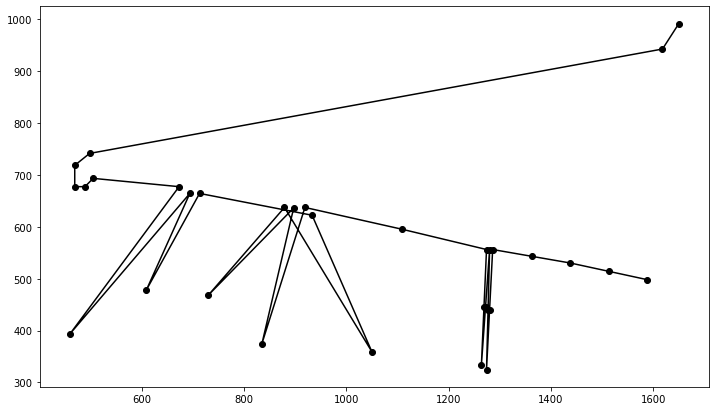

In [8]:
#отобразим вторую траекторию после добавления промежуточных точек
plt.figure(figsize = (12, 7))
plt.plot(second_track["x"], second_track["y"], "o-r", color = 'black')
plt.show()

Вычислим значение метрики Хаусдорфа для сравнения третьей и первой траектории:

In [9]:
directed_hausdorff(third_track, first_track)[0]

60.728905802755904

Для сравнения второй и первой траектории:

In [10]:
directed_hausdorff(second_track, first_track)[0]

73.02739212103907

Для сравнения четвертой траектории со всеми другими:

In [11]:
directed_hausdorff(fourth_track, first_track)[0]

156.46405337968207

In [12]:
directed_hausdorff(fourth_track, second_track)[0]

180.05554698481245

In [13]:
directed_hausdorff(fourth_track, third_track)[0]

177.49647883831386

Чем больше значение метрики, тем больше отличаются между собой траектории. Как видно из полученных результатов, третья траектория отличается от первой чуть меньше, чем вторая. Четвертая же траектория значительно отличается от каждой другой. 